In [1]:
import pandas
import geopandas
import numpy
import matplotlib.pyplot as plt
import rasterio 

%pip install pysal

%pip install pyspatialml
import pyspatialml 

%pip install seaborn
%pip install rioxarray
%pip install xarray
%pip install contextily
import seaborn
import rioxarray
import xarray
import contextily

%matplotlib inline

from matplotlib import colors
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import griddata
from rasterio.transform import Affine
from pysal.explore import esda
from pysal.lib import weights


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run

/anaconda/envs/working_env/lib/python3.10/site-packages/spaghetti/network.py:40: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
/anaconda/envs/working_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Bad pipe message: %s [b'\xf4\xc3\x1e\xfea2r1\xb25\x1c\xaf\xfe\xb7$G\xc5w \x99\x93\xd4kY\x93\x9c*\xe2\x0b\xca\xf7\x9ay\xfbC {\xc1\xbf)\x0b\xd0\xee\xd4\x89\xbdZ\x1cu\xe9\xd0\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \xa4\xb7nv']
Bad pipe message: %s [b'{\x9a\x90Y\xe1H.\xc6#\xca[\x7f\xfb\xcd\xdeJA^\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad']
Bad pipe message: %s [b"\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\x

https://www.wvview.org/os_gisc/python/spatial_ml/site/

In [8]:
schools = pandas.read_csv("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/BEN_Grid_Counts_1km_wData.csv")

schools = schools.dropna()

schools.head()

df = schools[['NUMPOINTS','x', 'y', 'land', 'pop', 'built_s', 'built_v', "smod_10", "smod_11", "smod_12", "smod_13", "smod_21", "smod_22", "smod_23", "smod_30"]]

df['SCHOOLS'] = [int(i>0) for i in df['NUMPOINTS']]

df.head()

/tmp/ipykernel_121955/3252023467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SCHOOLS'] = [int(i>0) for i in df['NUMPOINTS']]


,NUMPOINTS,x,y,land,pop,built_s,built_v,smod_10,smod_11,smod_12,smod_13,smod_21,smod_22,smod_23,smod_30,SCHOOLS
0,0,78071.2103,1.528119e+06,1000000.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,78071.2103,1.527119e+06,1000000.0,1.725281,60.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,78071.2103,1.526119e+06,1000000.0,1.771288,61.0,154.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,78071.2103,1.525119e+06,1000000.0,13.813747,479.0,1201.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,78071.2103,1.524119e+06,1000000.0,4.232688,147.0,368.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Create Geopandas GeoDataFrame

In [10]:
gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.x, df.y), crs = "ESRI:54009")

print(gdf.head())

   NUMPOINTS           x             y       land        pop  built_s  \
0          0  78071.2103  1.528119e+06  1000000.0   0.000000      0.0   
1          0  78071.2103  1.527119e+06  1000000.0   1.725281     60.0   
2          0  78071.2103  1.526119e+06  1000000.0   1.771288     61.0   
3          0  78071.2103  1.525119e+06  1000000.0  13.813747    479.0   
4          0  78071.2103  1.524119e+06  1000000.0   4.232688    147.0   

   built_v  smod_10  smod_11  smod_12  smod_13  smod_21  smod_22  smod_23  \
0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1    150.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2    154.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3   1201.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4    368.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   

   smod_30  SCHOOLS                       geometry  
0      0.0        0  POINT (78071.210 1528119

Make into a raster

In [52]:
df_array = df.to_numpy()
print(df.head())
numpy.info(df_array)

df_raster = rasterio.open(
    "/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/BEN_Grid_Counts_10km_wData.tif", 
    'w', driver = 'GTiff',
    height = df_array.shape[0],
    width = df_array.shape[1],
    count = 16,
    nodata = -9999,
    dtype = df_array.dtype,
    crs = "ESRI:54009",
    compress='lzw'
)

schools_raster = df_raster.write(df, 1)

   NUMPOINTS           x             y       land        pop  built_s  \
0          0  78071.2103  1.528119e+06  1000000.0   0.000000      0.0   
1          0  78071.2103  1.527119e+06  1000000.0   1.725281     60.0   
2          0  78071.2103  1.526119e+06  1000000.0   1.771288     61.0   
3          0  78071.2103  1.525119e+06  1000000.0  13.813747    479.0   
4          0  78071.2103  1.524119e+06  1000000.0   4.232688    147.0   

   built_v  smod_10  smod_11  smod_12  smod_13  smod_21  smod_22  smod_23  \
0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1    150.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
2    154.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
3   1201.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
4    368.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   

   smod_30  SCHOOLS  
0      0.0        0  
1      0.0        0  
2      0.0        0  
3      0.0

RasterioIOError: Attempt to create new tiff file '/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/BEN_Grid_Counts_10km_wData.tif' failed: Resource temporarily unavailable

In [40]:
df_raster = rasterio.open('/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/BEN_Grid_Counts_1km_wData.tif')

schools_raster = df_raster.write(df, 1)

/anaconda/envs/working_env/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


AttributeError: 'DatasetReader' object has no attribute 'write'

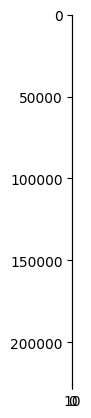

<Axes: >

In [36]:
rasterio.plot.show(df_raster)

Plot

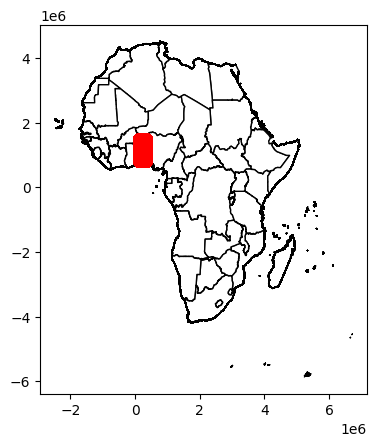

In [16]:
africa = geopandas.read_file("/home/azureuser/cloudfiles/code/Users/ariley/Data/Shapefiles/Africa_Shapefile/Africa_Boundaries.shp")
africa = africa.to_crs("ESRI:54009")
ax = africa.plot(color = "white", edgecolor = "black")

gdf.plot(ax = ax, color = "red")

plt.show()

In [9]:

train, test = train_test_split(df, test_size = .25, random_state = 42)

print(train.head())


train_y = train['SCHOOLS']
train_x = train.drop(columns=['SCHOOLS'])
test_y = test['SCHOOLS']
test_x = test.drop(columns=['SCHOOLS'])
print(train_y.head())
print(train_x.head())

        NUMPOINTS            x             y       land        pop  built_s  \
202356          0  344071.2103  8.001191e+05        0.0   0.000000      0.0   
84017           0  188071.2103  8.911191e+05  1000000.0   0.000000      0.0   
23716           0  109071.2103  1.310119e+06  1000000.0  14.569137   1040.0   
128643          0  247071.2103  9.871191e+05  1000000.0   4.901121    561.0   
35039           0  124071.2103  1.357119e+06  1000000.0   0.000000      0.0   

        built_v  smod_10  smod_11  smod_12  smod_13  smod_21  smod_22  \
202356      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
84017       0.0      0.0      1.0      0.0      0.0      0.0      0.0   
23716    2602.0      0.0      1.0      0.0      0.0      0.0      0.0   
128643   1403.0      0.0      1.0      0.0      0.0      0.0      0.0   
35039       0.0      0.0      1.0      0.0      0.0      0.0      0.0   

        smod_23  smod_30  SCHOOLS  
202356      0.0      0.0        0  
84017       0.

In [11]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [12]:
grid_search.fit(train_x, train_y)

grid_search.best_params_

rf_mod = grid_search.best_estimator_

print(rf_mod)
rfc_pred = rf_mod.predict(test_x)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   7.6s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=  14.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=  19.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=  19.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=  12.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=  13.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples


[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time= 1.1min

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=  13.3s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=  20.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=True, max_depth=110, max_featu

In [6]:
print(confusion_matrix(test_y,rfc_pred))
print(classification_report(test_y, rfc_pred))

rfc_prob = rf_mod.predict_proba(test_x)

print(test_y.head())
test_y2 = test_y.to_numpy()
roc_auc_score(test_y2, rfc_prob[:,1])

[[6418  435]
 [ 459 1954]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6853
           1       0.82      0.81      0.81      2413

    accuracy                           0.90      9266
   macro avg       0.88      0.87      0.87      9266
weighted avg       0.90      0.90      0.90      9266

21502    1
16170    0
34970    0
18134    1
441      0
Name: NUMPOINTS, dtype: int64


0.9595326375827128

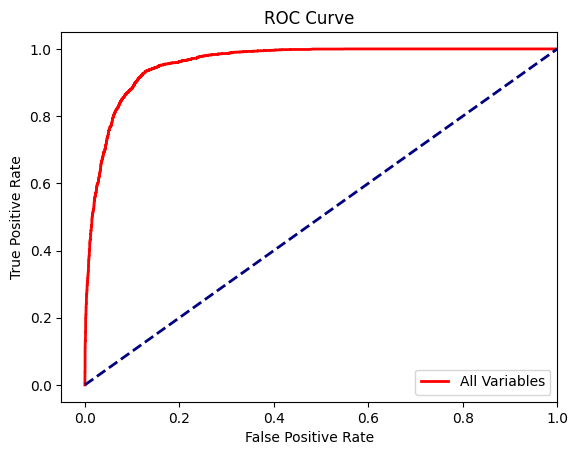

In [7]:
fpr, tpr, _ = roc_curve(test_y2,  rfc_prob[:, 1])
plt.plot(fpr,tpr, color ='red', lw=2, label="All Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [8]:
train_y = train['SCHOOLS']
train_x = train.drop(columns=['SCHOOLS'])
test_y = test['SCHOOLS']
test_x = test.drop(columns=['SCHOOLS'])

train_x_pop = pandas.DataFrame(train['pop'])
test_x_pop = pandas.DataFrame(test['pop'])

train_x_pop_sp = train[['pop', 'x', 'y']]
test_x_pop_sp = test[['pop', 'x', 'y']]

In [9]:
rf1 = RandomForestClassifier(n_estimators=200)
rf_model1 = rf1.fit(train_x, train_y)
rf2 = RandomForestClassifier(n_estimators=200)
rf_model2 = rf2.fit(train_x_pop, train_y)
rf3 = RandomForestClassifier(n_estimators=200)
rf_model3 = rf3.fit(train_x_pop_sp, train_y)

In [10]:
pred_model1= rf_model1.predict(test_x)
pred_model2 = rf_model2.predict(test_x_pop)
pred_model3 = rf_model3.predict(test_x_pop_sp)
print(classification_report(test_y, pred_model1))
print(classification_report(test_y, pred_model2))
print(classification_report(test_y, pred_model3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6853
           1       0.80      0.82      0.81      2413

    accuracy                           0.90      9266
   macro avg       0.87      0.87      0.87      9266
weighted avg       0.90      0.90      0.90      9266

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6853
           1       0.63      0.62      0.62      2413

    accuracy                           0.80      9266
   macro avg       0.75      0.74      0.75      9266
weighted avg       0.80      0.80      0.80      9266

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6853
           1       0.80      0.83      0.82      2413

    accuracy                           0.90      9266
   macro avg       0.87      0.88      0.87      9266
weighted avg       0.90      0.90      0.90      9266



In [11]:
test_y2 = test_y.to_numpy()

rfc_prob1 = rf_model1.predict_proba(test_x)
rfc_prob2 = rf_model2.predict_proba(test_x_pop)
rfc_prob3 = rf_model3.predict_proba(test_x_pop_sp)

print("All Variables: " + str(roc_auc_score(test_y2, rfc_prob1[:,1])))
print("Just Pop: " + str(roc_auc_score(test_y2, rfc_prob2[:,1])))
print("Pop + Coordinates: " + str(roc_auc_score(test_y2, rfc_prob3[:,1])))      

print(rfc_prob1)

All Variables: 0.9595692237841272
Just Pop: 0.8594468807360589
Pop + Coordinates: 0.961991714102239
[[0.315 0.685]
 [1.    0.   ]
 [1.    0.   ]
 ...
 [0.06  0.94 ]
 [0.71  0.29 ]
 [0.97  0.03 ]]


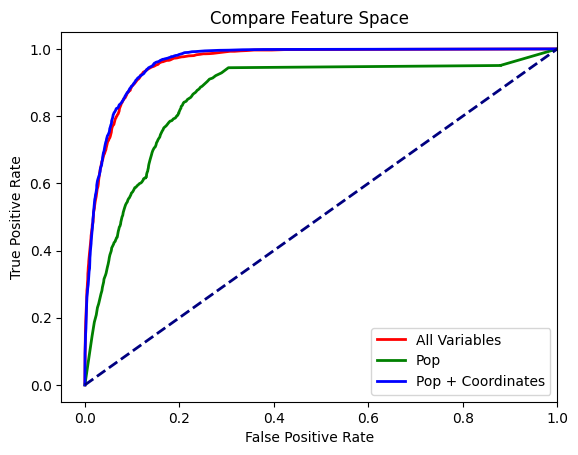

In [12]:
fpr1, tpr1, _ = roc_curve(test_y2,  rfc_prob1[:, 1])
fpr2, tpr2, _ = roc_curve(test_y2,  rfc_prob2[:, 1])
fpr3, tpr3, _ = roc_curve(test_y2,  rfc_prob3[:, 1])
plt.plot(fpr1,tpr1, color ='red', lw=2, label="All Variables")
plt.plot(fpr2,tpr2, color ='green', lw=2, label="Pop")
plt.plot(fpr3,tpr3, color ='blue', lw=2, label="Pop + Coordinates")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Compare Feature Space')
plt.legend(loc="lower right")
plt.show()

In [38]:
train_x_sub = train[['x','y','pop']]
test_x_sub = df[['x','y', 'pop']]

test_y = df['SCHOOLS']
train_y = train['SCHOOLS']

scaler = StandardScaler()
scale_fit = scaler.fit(train_x_sub)
train_x1 = pandas.DataFrame(scale_fit.transform(train_x_sub))
train_x1.columns = ['x','y','pop']
test_x1 = pandas.DataFrame(scale_fit.transform(test_x_sub))
test_x1.columns = ['x','y','pop']
print(train_x_sub.head())
print(train_x1.head())

                  x             y          pop
35483 -3.220870e+06 -1.384741e+06     0.000000
32055 -3.380870e+06 -1.184741e+06     0.000000
25561 -3.680870e+06 -1.447413e+05     0.000000
24793 -3.720870e+06 -9.847413e+05  1819.877914
30869 -3.440870e+06 -2.104741e+06     0.000000
          x         y       pop
0  1.581041 -0.311784 -0.100913
1  1.262319  0.013537 -0.100913
2  0.664715  1.705206 -0.100913
3  0.585035  0.338858 -0.006939
4  1.142798 -1.482940 -0.100913


In [39]:
rf_comp =  RandomForestClassifier(n_estimators=200)
knn_comp = KNeighborsClassifier(n_neighbors=7)
svm_comp =  SVC()

rf_compM = rf_comp.fit(train_x1, train_y)
knn_compM = knn_comp.fit(train_x1, train_y)
svm_compM = rf_comp.fit(train_x1, train_y)

In [40]:
test_y = df['NUMPOINTS']

pred_rf_comp= rf_compM.predict(test_x1)
pred_knn_comp = knn_compM.predict(test_x1)
pred_svm_comp = svm_compM.predict(test_x1)

print(pred_rf_comp[:100])
print(pred_knn_comp[:100])
print(pred_svm_comp[:100])

print(classification_report(test_y, pred_rf_comp))
print(classification_report(test_y, pred_knn_comp))
print(classification_report(test_y, pred_svm_comp))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27351
           1       0.95      0.96      0.95      9711

    accuracy                           0.98     37062
   macro avg       0.97      0.97      0.97     37062
weighted avg       0.98      0.98      0.98     37062

              precision    recall  f1-score   support

      

In [41]:
train_x_sub = train[['x','y','pop']]
test_x_sub = test[['x','y','pop']]

scaler = StandardScaler()
scale_fit = scaler.fit(train_x_sub)
train_x2 = pandas.DataFrame(scale_fit.transform(train_x_sub))
train_x2.columns = ['x','y','pop']
test_x2 = pandas.DataFrame(scale_fit.transform(test_x_sub))
test_x2.columns = ['x','y','pop']
print(train_x_sub.head())
print(train_x2.head())

                  x             y          pop
35483 -3.220870e+06 -1.384741e+06     0.000000
32055 -3.380870e+06 -1.184741e+06     0.000000
25561 -3.680870e+06 -1.447413e+05     0.000000
24793 -3.720870e+06 -9.847413e+05  1819.877914
30869 -3.440870e+06 -2.104741e+06     0.000000
          x         y       pop
0  1.581041 -0.311784 -0.100913
1  1.262319  0.013537 -0.100913
2  0.664715  1.705206 -0.100913
3  0.585035  0.338858 -0.006939
4  1.142798 -1.482940 -0.100913


In [42]:
rf_comp =  RandomForestClassifier(n_estimators=200)
knn_comp = KNeighborsClassifier(n_neighbors=7)
svm_comp =  SVC()

rf_compM = rf_comp.fit(train_x2, train_y)
knn_compM = knn_comp.fit(train_x2, train_y)
svm_compM = rf_comp.fit(train_x2, train_y)

In [43]:
test_y = test['NUMPOINTS']

pred_rf_comp= rf_compM.predict(test_x2)
pred_knn_comp = knn_compM.predict(test_x2)
pred_svm_comp = svm_compM.predict(test_x2)

pred_knn_comp[:100]

print(classification_report(test_y, pred_rf_comp))
print(classification_report(test_y, pred_knn_comp))
print(classification_report(test_y, pred_svm_comp))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6853
           1       0.80      0.83      0.82      2413

    accuracy                           0.90      9266
   macro avg       0.87      0.88      0.88      9266
weighted avg       0.90      0.90      0.90      9266

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6853
           1       0.80      0.80      0.80      2413

    accuracy                           0.90      9266
   macro avg       0.87      0.87      0.87      9266
weighted avg       0.90      0.90      0.90      9266

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6853
           1       0.80      0.83      0.82      2413

    accuracy                           0.90      9266
   macro avg       0.87      0.88      0.88      9266
weighted avg       0.90      0.90      0.90      9266



In [44]:
test_y2 = test_y.to_numpy()

rf_comp_prob = rf_compM.predict_proba(test_x2)
knn_comp_prob = knn_compM.predict_proba(test_x2)
svm_comp_prob = svm_compM.predict_proba(test_x2)

print("RF: " + str(roc_auc_score(test_y2, rf_comp_prob[:,1])))
print("K-NN: " + str(roc_auc_score(test_y2, knn_comp_prob[:,1])))
print("SVM: " + str(roc_auc_score(test_y2, svm_comp_prob[:,1])))

RF: 0.9619716068097263
K-NN: 0.9551243631506441
SVM: 0.9619716068097263


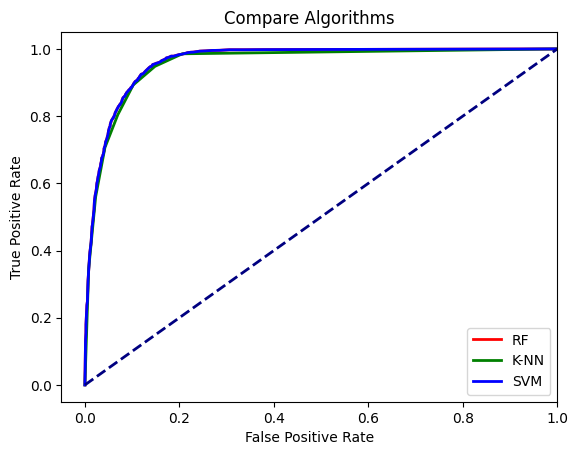

In [45]:
fpr1, tpr1, _ = roc_curve(test_y2,  rf_comp_prob[:, 1])
fpr2, tpr2, _ = roc_curve(test_y2,  knn_comp_prob[:, 1])
fpr3, tpr3, _ = roc_curve(test_y2,  svm_comp_prob[:, 1])
plt.plot(fpr1,tpr1, color ='red', lw=2, label="RF")
plt.plot(fpr2,tpr2, color ='green', lw=2, label="K-NN")
plt.plot(fpr3,tpr3, color ='blue', lw=2, label="SVM")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Compare Algorithms')
plt.legend(loc="lower right")
plt.show()

              x              y       land          pop  built_s  built_v  \
0 -4.880870e+06 -134741.256537  524786.59  3139.734771   590.71   590.71   
1 -4.880870e+06 -144741.256537       0.00     0.000000     0.00     0.00   
2 -4.880870e+06 -154741.256537       0.00     0.000000     0.00     0.00   
3 -4.880870e+06 -164741.256537       0.00     0.000000     0.00     0.00   
4 -4.880870e+06 -174741.256537  429793.63  2943.385545   833.27   833.27   

   smod.10  smod.11  smod.12  smod.13  smod.21  smod.22  smod.23  smod.30  
0     43.0     40.0     15.0      2.0      0.0      0.0      0.0      0.0  
1    100.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
2    100.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
3    100.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
4     50.0     30.0     17.0      3.0      0.0      0.0      0.0      0.0  


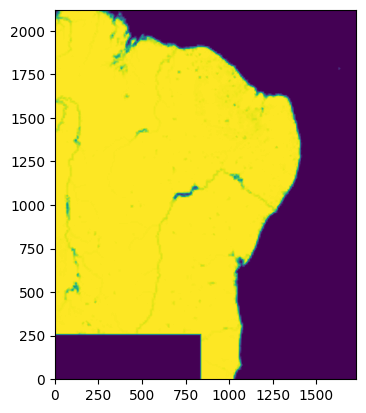

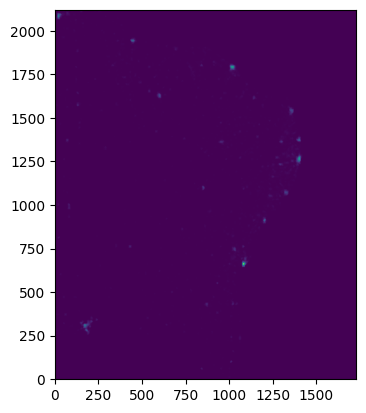

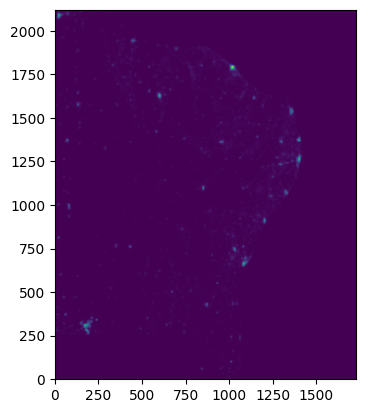

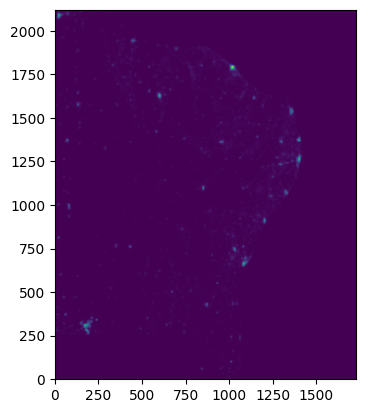

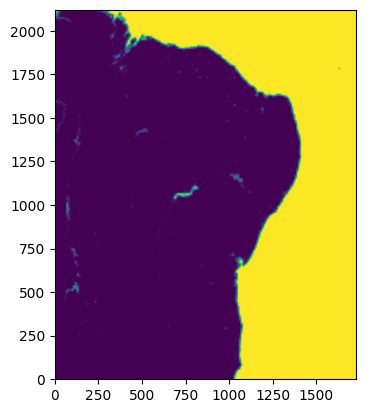

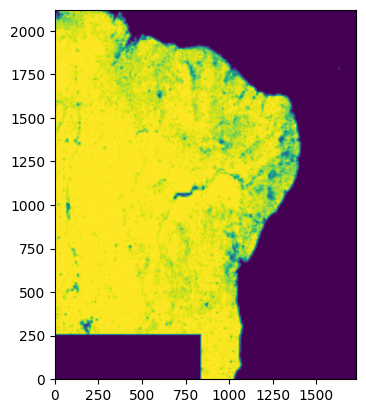

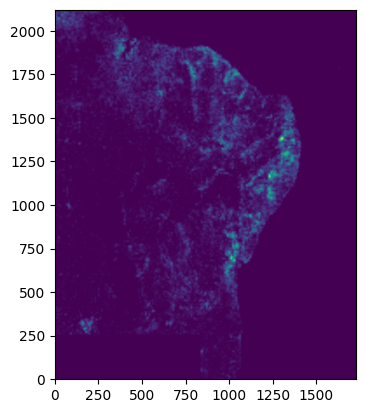

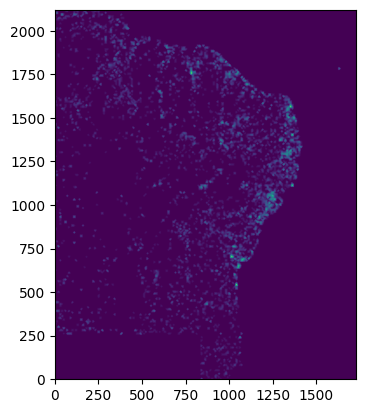

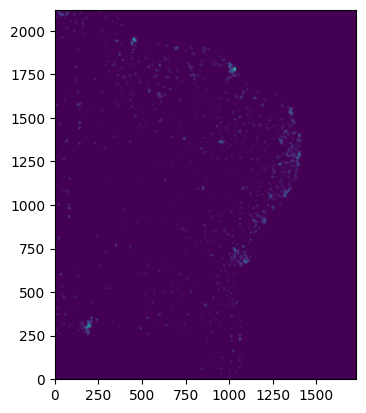

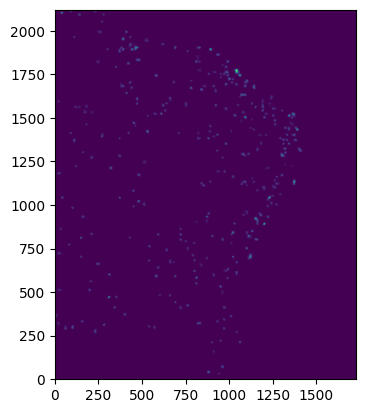

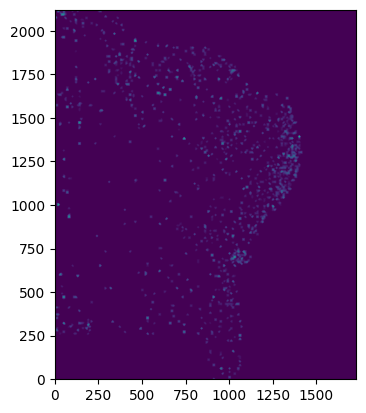

In [55]:
preds = df.drop(columns=['NUMPOINTS'])
print(preds.head())

points = list(zip(df.x, df.y))
values = preds.values
#print(points[:5])
#print(values.names())

xRange = numpy.arange(df.x.min(),df.x.max() + 1000, 1000)
yRange = numpy.arange(df.y.min(),df.y.max() + 1000, 1000)
#print(xRange[:5],yRange[:5])

gridX,gridY = numpy.meshgrid(xRange, yRange)

gridPh = griddata(points, values, (gridX,gridY), method='linear')

gridPh_reshaped = numpy.transpose(gridPh, (2,0,1))

for i in range(2,13):
    plt.figure()
    plt.imshow(gridPh_reshaped[i, :, :], origin = 'lower')
    plt.show()



In [62]:
# make my raster from spatial ml with crs and other things from https://pypi.org/project/pyspatialml/
# 
#r_preds = gridPh_reshaped

from rasterio.transform import Affine
transform = Affine.translation(gridX[0][0]-1000/2, gridY[0][0]-1000/2)*Affine.scale(1000,1000)

from rasterio.crs import CRS
rasterCrs = CRS.from_authority('ESRI', 54009)
rasterCrs.data

from pyspatialml import Raster
r_preds = Raster(gridPh_reshaped, crs = rasterCrs, transform = transform)

print(r_preds.names)

r_preds.names = ['x', 'y', 'land', 'pop', 'built_s', 'built_v', "smod.10", "smod.11", "smod.12", "smod.13", "smod.21", "smod.22", "smod.23", "smod.30"]

#r_preds.rename({'tmppmmrmldl_1':"x", 'tmppmmrmldl_2':'y', 'tmppmmrmldl_3':'land', 'tmppmmrmldl_4':'pop', 'tmppmmrmldl_5':'built_s', 'tmppmmrmldl_6':'built_v', 'tmppmmrmldl_7':"smod.10", 'tmppmmrmldl_8':"smod.11", 'tmppmmrmldl_9':"smod.12", 'tmppmmrmldl_10':"smod.13", 'tmppmmrmldl_11':"smod.21", 'tmppmmrmldl_12':"smod.22", 'tmppmmrmldl_13':"smod.23", 'tmppmmrmldl_14':"smod.30"})
print(r_preds.names)

dict_keys(['tmpuy00ybat_1', 'tmpuy00ybat_2', 'tmpuy00ybat_3', 'tmpuy00ybat_4', 'tmpuy00ybat_5', 'tmpuy00ybat_6', 'tmpuy00ybat_7', 'tmpuy00ybat_8', 'tmpuy00ybat_9', 'tmpuy00ybat_10', 'tmpuy00ybat_11', 'tmpuy00ybat_12', 'tmpuy00ybat_13', 'tmpuy00ybat_14'])
dict_keys(['x', 'y', 'land', 'pop', 'built_s', 'built_v', 'smod.10', 'smod.11', 'smod.12', 'smod.13', 'smod.21', 'smod.22', 'smod.23', 'smod.30'])


In [63]:
result = r_preds.predict_proba(estimator = rf_mod)

print(result.head())

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.w

[[[0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118 ]
  [0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118 ]
  [0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118 ]
  [0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118  0.9955118 ]
  [0.9955118  0.9955118  0.9955118  0.9955118  0.9955118  0.9955118
   0.9955118

In [64]:
result.write("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/NE_10km_school_count_pred2.tif")

CPLE_AppDefinedError: /home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/NE_10km_school_count_pred2.tif: MissingRequired:TIFF directory is missing required "StripOffsets" field

In [3]:
m_result = rasterio.open("/home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/NE_10km_school_count_pred2.tif")
m_result_arr = m_result.read(2)

plt.rcParams['figure.figsize'] = [10, 8]
plt.imshow(m_result_arr, cmap="viridis", vmin=0, vmax=1, origin = "lower")
plt.legend(loc = "right")

RasterioIOError: /home/azureuser/cloudfiles/code/Users/ariley/Data/Schools/School_Counts/NE_10km_school_count_pred2.tif: MissingRequired:TIFF directory is missing required "StripOffsets" field